In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('./creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156598 entries, 0 to 156597
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    156598 non-null  float64
 1   V1      156598 non-null  float64
 2   V2      156598 non-null  float64
 3   V3      156598 non-null  float64
 4   V4      156598 non-null  float64
 5   V5      156598 non-null  float64
 6   V6      156598 non-null  float64
 7   V7      156598 non-null  float64
 8   V8      156598 non-null  float64
 9   V9      156598 non-null  float64
 10  V10     156598 non-null  float64
 11  V11     156598 non-null  float64
 12  V12     156598 non-null  float64
 13  V13     156598 non-null  float64
 14  V14     156598 non-null  float64
 15  V15     156598 non-null  float64
 16  V16     156598 non-null  float64
 17  V17     156598 non-null  float64
 18  V18     156598 non-null  float64
 19  V19     156598 non-null  float64
 20  V20     156598 non-null  float64
 21  V21     15

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,...,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000,156598.000000
mean,56110.039036,-0.226407,0.048364,0.592988,0.138916,-0.226443,0.070144,-0.102428,0.046500,-0.000028,...,-0.037746,-0.107734,-0.027034,0.009345,0.110171,0.019975,0.001362,0.002442,88.197435,0.002235
std,23392.570512,1.845464,1.623739,1.342703,1.359486,1.333474,1.291754,1.215784,1.247148,1.153602,...,0.748529,0.650180,0.589137,0.596356,0.453141,0.492815,0.394090,0.311983,246.292004,0.047223
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39714.250000,-1.016058,-0.535194,0.078520,-0.719106,-0.865308,-0.675730,-0.598412,-0.147474,-0.674440,...,-0.231027,-0.551290,-0.171199,-0.329188,-0.166769,-0.327052,-0.063966,-0.012219,5.850000,0.000000
50%,57465.000000,-0.252617,0.121445,0.696587,0.153750,-0.270241,-0.187682,-0.048747,0.069705,-0.099787,...,-0.060556,-0.084196,-0.040999,0.062580,0.151412,-0.056233,0.010349,0.022535,22.060000,0.000000
75%,74680.000000,1.167915,0.808896,1.335823,0.971451,0.307778,0.458528,0.439555,0.364539,0.616130,...,0.114602,0.324127,0.091122,0.411275,0.410020,0.286535,0.089533,0.078087,78.000000,0.000000
max,108478.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
data.shape

(156598, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(598)

Data Cleaning

In [9]:
# Drop the NULL values from the dataset
data.drop_duplicates(inplace=True)

data.duplicated().sum()

np.int64(0)

In [10]:
data.shape

(156000, 31)

In [11]:
# Create Class_Category based on Class values
data['Class_Category'] = np.where(data['Class'] == 0, 'Normal', 'Fraud')

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_Category
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Normal


In [13]:
data['Class'].value_counts()

Class
0    155668
1       332
Name: count, dtype: int64

In [14]:
data['Class_Category'].value_counts()

Class_Category
Normal    155668
Fraud        332
Name: count, dtype: int64

Data Visualization

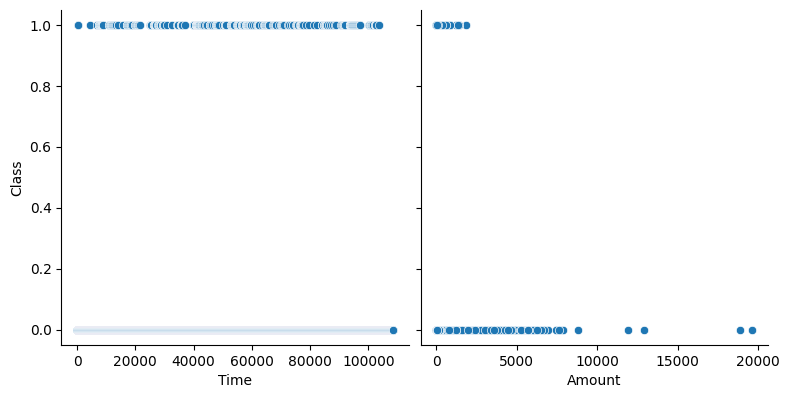

In [15]:
sns.pairplot(data, x_vars=['Time', 'Amount'], y_vars='Class', height=4, aspect=1, kind='scatter')
plt.show()

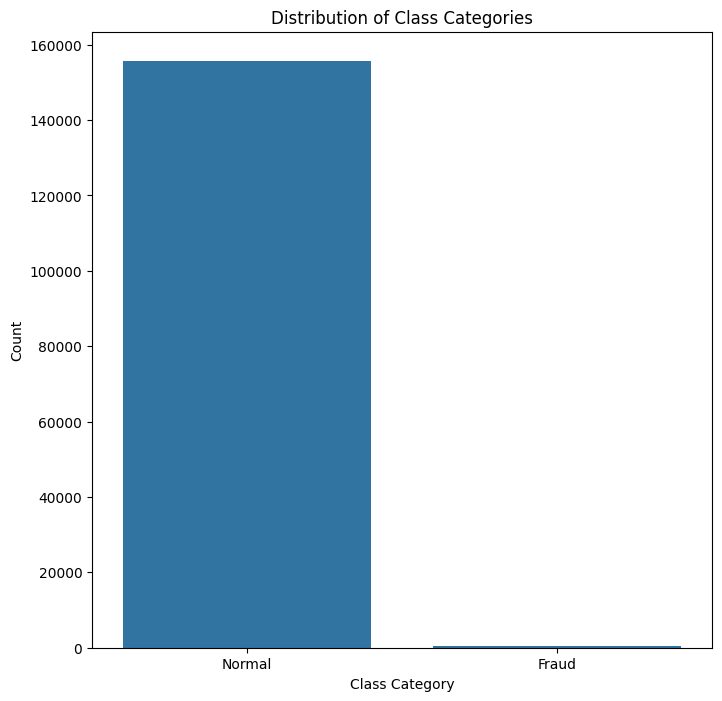

In [16]:
# Distribution of Class Categories
plt.figure(figsize=(8, 8))
sns.countplot(x='Class_Category', data=data)
plt.title('Distribution of Class Categories')
plt.xlabel('Class Category')
plt.ylabel('Count')
plt.show()

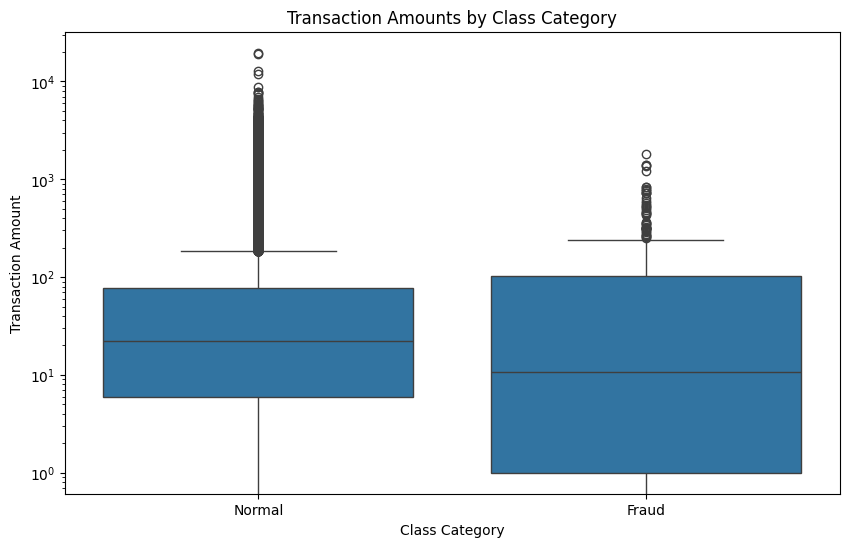

In [17]:
# Box Plot for Transaction Amounts by Class Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class_Category', y='Amount', data=data)
plt.title('Transaction Amounts by Class Category')
plt.xlabel('Class Category')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale to handle outliers
plt.show()

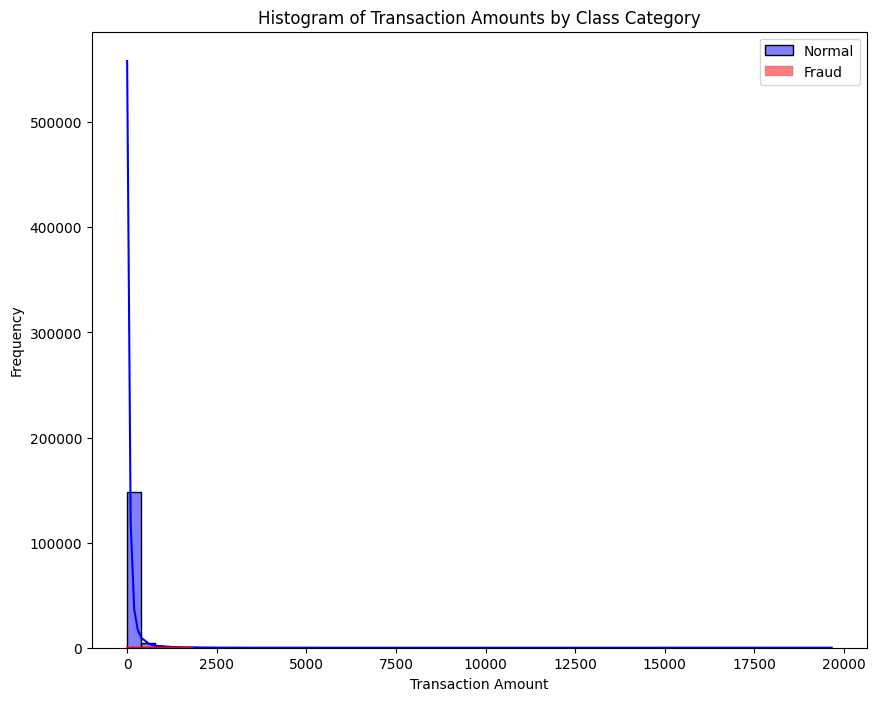

In [18]:
# Histogram of Transaction Amounts
plt.figure(figsize=(10, 8))
sns.histplot(data[data['Class_Category'] == 'Normal']['Amount'], bins=50, color='blue', label='Normal', kde=True)
sns.histplot(data[data['Class_Category'] == 'Fraud']['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Histogram of Transaction Amounts by Class Category')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

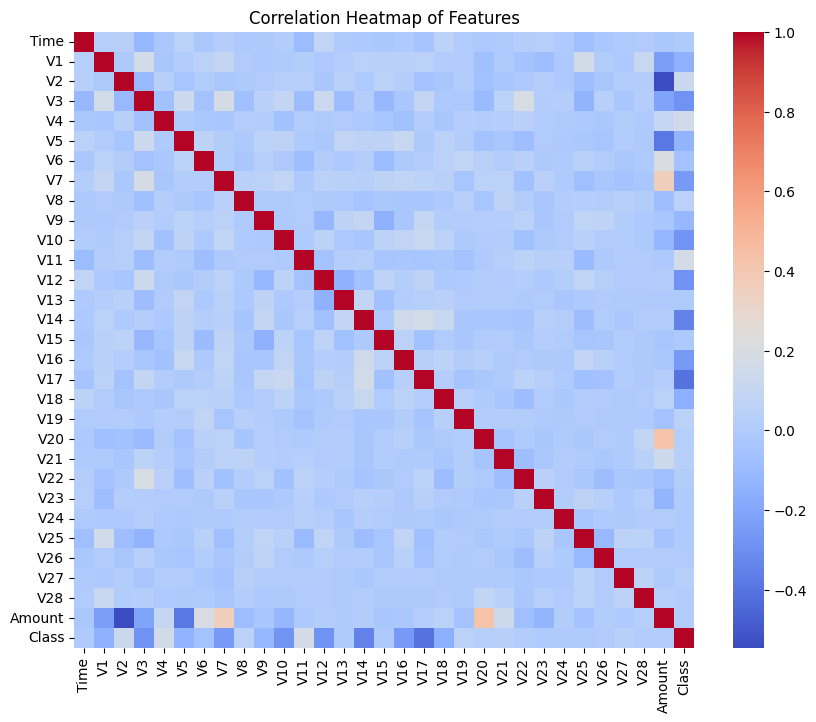

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)  # Include only numeric columns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

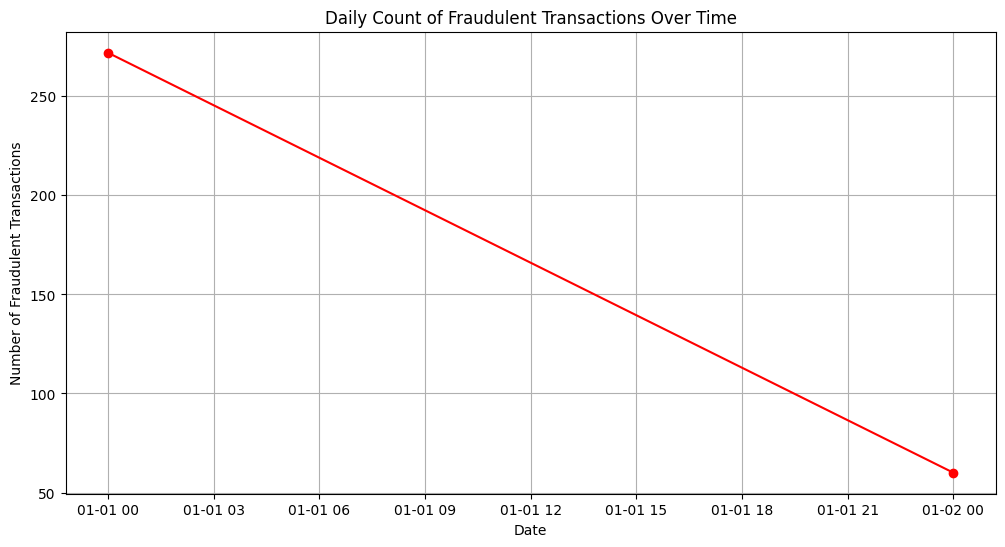

In [20]:
# Time Series Analysis of Fraudulent Transactions
# Assuming 'Time' is in seconds since the first transaction; convert it to datetime if needed.
data['Date'] = pd.to_datetime(data['Time'], unit='s')

# Group by date and count fraudulent transactions
fraud_time_series = data[data['Class_Category'] == 'Fraud'].groupby(data['Date'].dt.date).size()

plt.figure(figsize=(12, 6))
fraud_time_series.plot(kind='line', marker='o', color='red')
plt.title('Daily Count of Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid()
plt.show()

In [21]:
## Get the Fraud and the normal dataset 
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape,normal.shape)

(332, 33) (155668, 33)


In [22]:
fraud.Amount.describe()

count     332.000000
mean      112.757771
std       232.268089
min         0.000000
25%         1.000000
50%        10.685000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64

In [23]:
normal.Amount.describe()

count    155668.000000
mean         88.261988
std         246.635855
min           0.000000
25%           5.900000
50%          22.160000
75%          78.000000
max       19656.530000
Name: Amount, dtype: float64

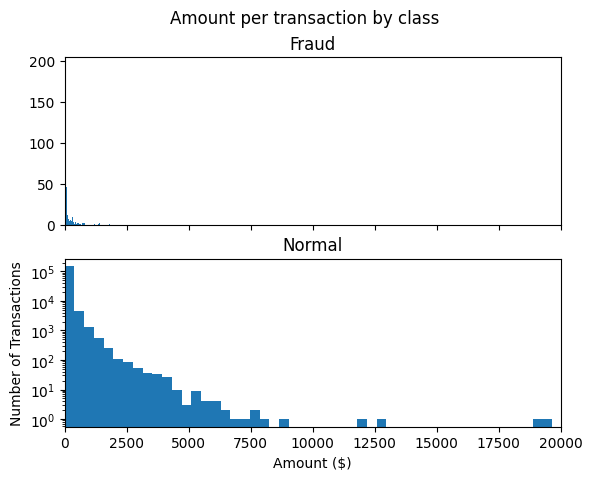

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

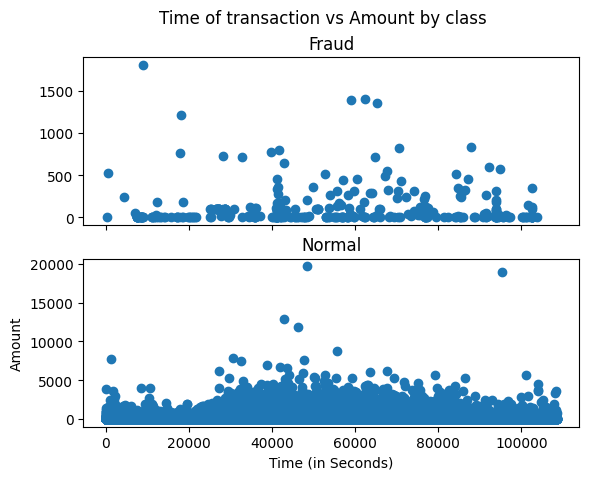

In [25]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Feature Engineering

In [28]:
X = data.iloc[:, [1, 29]].values
Y = data.iloc[:, 30].values
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.25, random_state=42)

In [29]:
# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of training data : ', accuracy*100, '%')

Accuracy score of training data :  99.76153846153846 %


In [31]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38912
           1       0.31      0.05      0.08        88

    accuracy                           1.00     39000
   macro avg       0.65      0.52      0.54     39000
weighted avg       1.00      1.00      1.00     39000


Confusion Matrix:
[[38903     9]
 [   84     4]]


In [32]:

# Calculate performance metrics using test_pred and test_y
print("Performance of Regression test are as follows:", '\n')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Performance of Regression test are as follows: 

Mean Absolute Error: 0.0023846153846153848
Mean Squared Error: 0.0023846153846153848
Root Mean Squared Error: 0.04883252384031963


                                                    Thank You                                                                        .